In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="nb0lpwpYXEsbbo5uinX3")
project = rf.workspace("roboflow-100").project("liver-disease")
version = project.version(2)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.8 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to liver-disease-2 in yolov8:: 100%|██████████| 7964/7964 [00:01<00:00, 6966.18it/s]


In [ ]:
!pip install ultralytics
!pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 903.1/903.1 kB 23.4 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

# Paths to your dataset and model
data_yaml = "/content/liver-disease-2/data.yaml"  # Create this YAML file to define your dataset
model_save_path = "runs/detect/yolov11_liver_tumor"

# 1. Load the YOLOv11 model
model = YOLO("yolov8n.pt")  # Using YOLOv8 as YOLOv11 is currently based on Ultralytics core

# 2. Train the model
model.train(
    data=data_yaml,  # Path to the dataset YAML
    epochs=25,       # Number of epochs
    imgsz=640,       # Image size
    batch=16,        # Batch size
    name="liver_disease_model.pt"  # Save results under this name
)

# 3. Evaluate the model
results = model.val()


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 119MB/s]


Ultralytics 8.3.54 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/liver-disease-2/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=liver_disease_model.pt, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, s

100%|██████████| 755k/755k [00:00<00:00, 20.1MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 111MB/s]


AMP: checks passed ✅


train: Scanning /content/liver-disease-2/train/labels... 2782 images, 8 backgrounds, 0 corrupt: 100%|██████████| 2782/2782 [00:01<00:00, 1904.86it/s]

train: WARNING ⚠️ /content/liver-disease-2/train/images/208_5_14_31_jpg.rf.82f7adcfc8039be1329a0ad6dce37f71.jpg: 1 duplicate labels removed
train: New cache created: /content/liver-disease-2/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.24 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/liver-disease-2/valid/labels... 794 images, 4 backgrounds, 0 corrupt: 100%|██████████| 794/794 [00:01<00:00, 595.24it/s]

val: New cache created: /content/liver-disease-2/valid/labels.cache


Plotting labels to runs/detect/liver_disease_model.pt/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/liver_disease_model.pt
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      2.21G      1.536      3.029      1.536         59        640: 100%|██████████| 174/174 [00:54<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.54it/s]

                   all        794       1937      0.736      0.252      0.279      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      2.27G      1.444      2.324      1.431         49        640: 100%|██████████| 174/174 [00:51<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.38it/s]


                   all        794       1937      0.236       0.33      0.265      0.159

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      2.16G      1.434      2.115      1.432         68        640: 100%|██████████| 174/174 [00:50<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.33it/s]

                   all        794       1937      0.352      0.405      0.358      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      2.18G      1.431      1.994       1.42         44        640: 100%|██████████| 174/174 [00:52<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  4.02it/s]


                   all        794       1937      0.309      0.504      0.375      0.237

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      2.24G      1.401      1.893      1.417         27        640: 100%|██████████| 174/174 [00:51<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  3.00it/s]

                   all        794       1937      0.403      0.382      0.368      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      2.17G      1.385      1.838      1.394         48        640: 100%|██████████| 174/174 [00:51<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  4.10it/s]

                   all        794       1937      0.354      0.589      0.435      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      2.26G       1.37      1.787      1.388         52        640: 100%|██████████| 174/174 [00:50<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  2.89it/s]

                   all        794       1937       0.44      0.508      0.453      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      2.16G      1.344       1.75      1.368         55        640: 100%|██████████| 174/174 [00:51<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  4.16it/s]

                   all        794       1937      0.374      0.564       0.47      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      2.27G      1.339      1.687      1.355         28        640: 100%|██████████| 174/174 [00:51<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  2.87it/s]

                   all        794       1937      0.394      0.579      0.465      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      2.18G      1.296      1.635      1.341         62        640: 100%|██████████| 174/174 [00:51<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.24it/s]


                   all        794       1937      0.422      0.554      0.472      0.299

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      2.26G      1.316      1.648      1.352         52        640: 100%|██████████| 174/174 [00:51<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.70it/s]

                   all        794       1937      0.403      0.587      0.502       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      2.15G        1.3      1.616      1.338         45        640: 100%|██████████| 174/174 [00:51<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  4.10it/s]

                   all        794       1937      0.478      0.556      0.524       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      2.24G      1.301      1.609      1.346         67        640: 100%|██████████| 174/174 [00:51<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  2.81it/s]

                   all        794       1937      0.422       0.62       0.53      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      2.17G      1.284      1.559      1.327         66        640: 100%|██████████| 174/174 [00:52<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  4.04it/s]

                   all        794       1937       0.46      0.563      0.525      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      2.26G      1.256      1.516      1.315         79        640: 100%|██████████| 174/174 [00:52<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.16it/s]

                   all        794       1937      0.435      0.536      0.492      0.319


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      2.24G      1.259      1.553      1.337         41        640: 100%|██████████| 174/174 [00:52<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  4.14it/s]

                   all        794       1937       0.48      0.582      0.529      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      2.26G      1.236      1.468      1.326         26        640: 100%|██████████| 174/174 [00:49<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.69it/s]

                   all        794       1937      0.471      0.596      0.548      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      2.17G      1.231      1.439      1.318         32        640: 100%|██████████| 174/174 [00:50<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.86it/s]

                   all        794       1937      0.502      0.584      0.558       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      2.24G      1.224      1.416      1.327         31        640: 100%|██████████| 174/174 [00:50<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  4.06it/s]

                   all        794       1937        0.5      0.602      0.564      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      2.13G      1.215      1.405      1.317         28        640: 100%|██████████| 174/174 [00:50<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.75it/s]

                   all        794       1937      0.494      0.572      0.542      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      2.24G        1.2       1.36      1.303         32        640: 100%|██████████| 174/174 [00:47<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.30it/s]

                   all        794       1937      0.531      0.568      0.571      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      2.15G      1.184      1.325      1.297         24        640: 100%|██████████| 174/174 [00:49<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.18it/s]


                   all        794       1937      0.528      0.586      0.584      0.382

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      2.22G      1.172      1.299      1.283         25        640: 100%|██████████| 174/174 [00:50<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  3.08it/s]

                   all        794       1937      0.516      0.594      0.575      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      2.15G      1.154      1.266      1.269         54        640: 100%|██████████| 174/174 [00:48<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.25it/s]


                   all        794       1937       0.53      0.605      0.585      0.381

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      2.26G      1.157      1.273      1.277         34        640: 100%|██████████| 174/174 [00:49<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  4.12it/s]

                   all        794       1937      0.533      0.609      0.592      0.385



25 epochs completed in 0.413 hours.
Optimizer stripped from runs/detect/liver_disease_model.pt/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/liver_disease_model.pt/weights/best.pt, 6.2MB

Validating runs/detect/liver_disease_model.pt/weights/best.pt...
Ultralytics 8.3.54 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:10<00:00,  2.34it/s]


                   all        794       1937      0.532      0.609      0.592      0.385
            ballooning        198        417      0.658       0.83      0.815      0.643
              fibrosis        198        359      0.511      0.379      0.415       0.16
          inflammation        196        558      0.389      0.439       0.39      0.185
             steatosis        198        603      0.572      0.788      0.746      0.552
Speed: 0.3ms preprocess, 2.5ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/liver_disease_model.pt
Ultralytics 8.3.54 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/liver-disease-2/valid/labels.cache... 794 images, 4 backgrounds, 0 corrupt: 100%|██████████| 794/794 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:11<00:00,  4.29it/s]


                   all        794       1937      0.532      0.611      0.593      0.386
            ballooning        198        417      0.656      0.832      0.818      0.644
              fibrosis        198        359      0.512      0.383      0.414      0.161
          inflammation        196        558       0.39      0.442      0.392      0.186
             steatosis        198        603       0.57      0.788      0.746      0.552
Speed: 0.3ms preprocess, 4.3ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/liver_disease_model.pt2


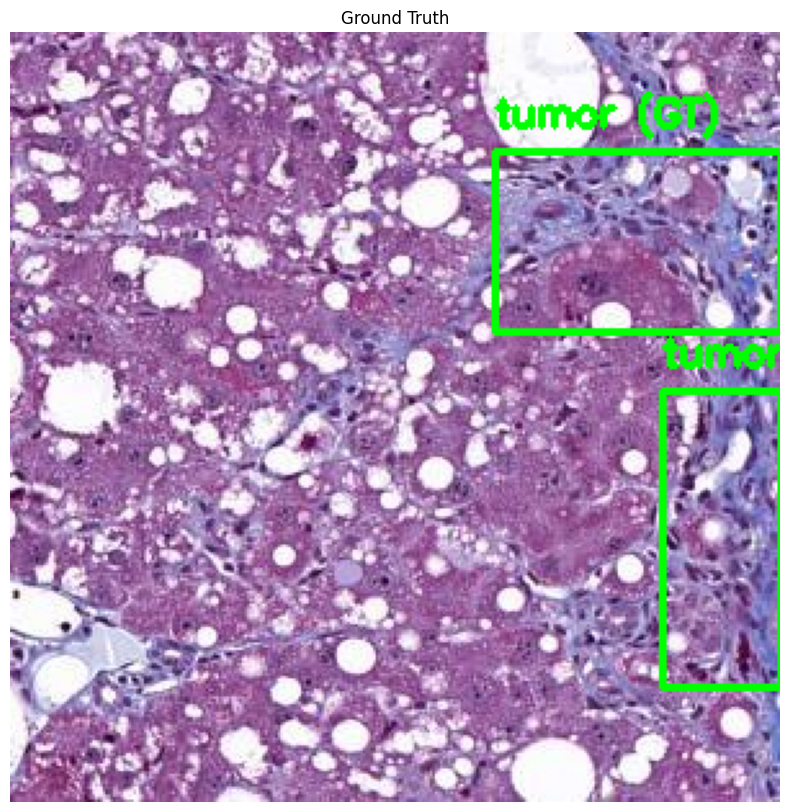


image 1/1 /content/liver-disease-2/test/images/15_242_212_25_20_jpg.rf.0e1711a2ca5c5d3edb0f4d1d983dfd61.jpg: 640x640 (no detections), 9.5ms
Speed: 3.1ms preprocess, 9.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict3


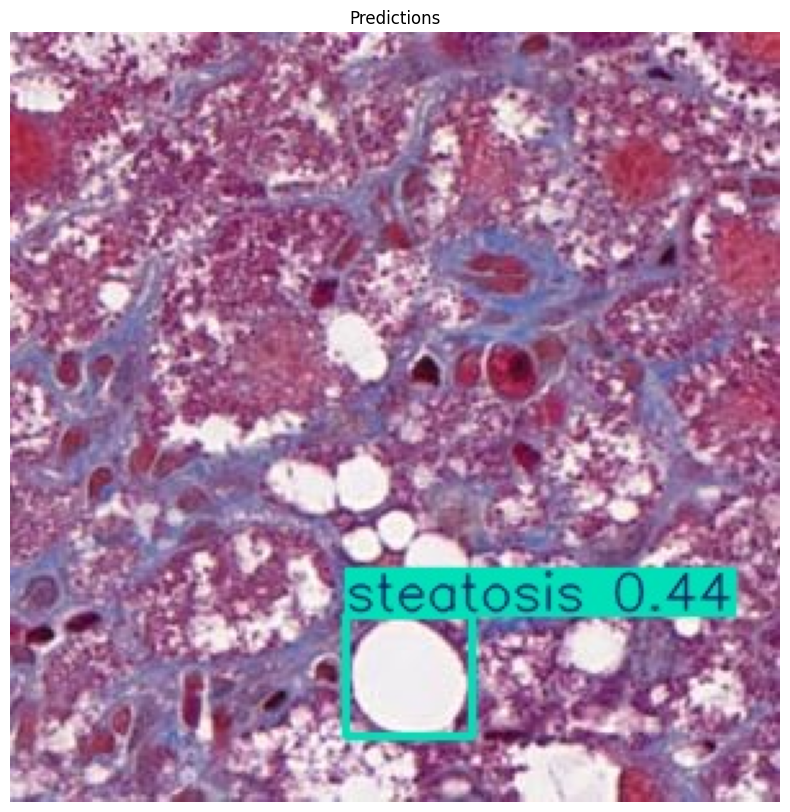

In [ ]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
import os

def plot_ground_truth(image_path, label_path):
    """
    Plots the ground-truth bounding boxes from the label file on the given image.
    """
    # Load the image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Read label file and draw boxes
    with open(label_path, "r") as file:
        for line in file:
            data = line.strip().split()
            cls, cx, cy, w, h = map(float, data)

            # Convert normalized coordinates (cx, cy, w, h) to pixel coordinates
            height, width, _ = img.shape
            x1 = int((cx - w / 2) * width)
            y1 = int((cy - h / 2) * height)
            x2 = int((cx + w / 2) * width)
            y2 = int((cy + h / 2) * height)

            # Draw the bounding box (green for ground-truth)
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(img, "tumor (GT)", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Display the image with bounding boxes
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis("off")
    plt.title("Ground Truth")
    plt.show()

    return img


def test_model(image_path, model_path="/content/runs/detect/liver_disease_model.pt/weights/best.pt"):
    """
    Uses the trained YOLOv8 model to predict bounding boxes on the given image.
    """
    # Load the trained model
    model = YOLO(model_path)

    # Run inference on the image
    results = model.predict(source=image_path, save=True)

    # Check if image0.jpg is created
    result_img_path = "/content/runs/detect/predict/102_1_3_61_jpg.rf.39ea4cf296518310e4501dfaf587af62.jpg"
    if not os.path.exists(result_img_path):
        print(f"Error: {result_img_path} does not exist.")
        return

    # Visualize predictions
    results_img = cv2.imread(result_img_path)
    if results_img is None:
        print(f"Error: Failed to read {result_img_path}.")
        return

    results_img = cv2.cvtColor(results_img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 10))
    plt.imshow(results_img)
    plt.axis("off")
    plt.title("Predictions")
    plt.show()



# Paths to image and label file
image_path = "/content/liver-disease-2/test/images/15_242_212_25_20_jpg.rf.0e1711a2ca5c5d3edb0f4d1d983dfd61.jpg"  # Replace with the image path
label_path = "/content/liver-disease-2/test/labels/15_242_212_25_20_jpg.rf.0e1711a2ca5c5d3edb0f4d1d983dfd61.txt"  # Replace with the corresponding label file path

# 1. Plot Ground Truth
gt_img = plot_ground_truth(image_path, label_path)

# 2. Test the Model
test_model(image_path)


In [ ]:
import yaml

# Specify the path to your .yaml file
file_path = "/content/liver-disease-2/data.yaml"

# Open and load the .yaml file
with open(file_path, 'r') as file:
    data = yaml.safe_load(file)

# Print the contents of the file
print(data)


{'names': ['ballooning', 'fibrosis', 'inflammation', 'steatosis'], 'nc': 4, 'roboflow': {'license': 'CC BY 4.0', 'project': 'liver-disease', 'url': 'https://universe.roboflow.com/roboflow-100/liver-disease/dataset/2', 'version': 2, 'workspace': 'roboflow-100'}, 'test': '../test/images', 'train': '../train/images', 'val': '../valid/images'}



image 1/1 /content/liver-disease-2/test/images/15_242_212_25_20_jpg.rf.0e1711a2ca5c5d3edb0f4d1d983dfd61.jpg: 640x640 (no detections), 8.9ms
Speed: 2.3ms preprocess, 8.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


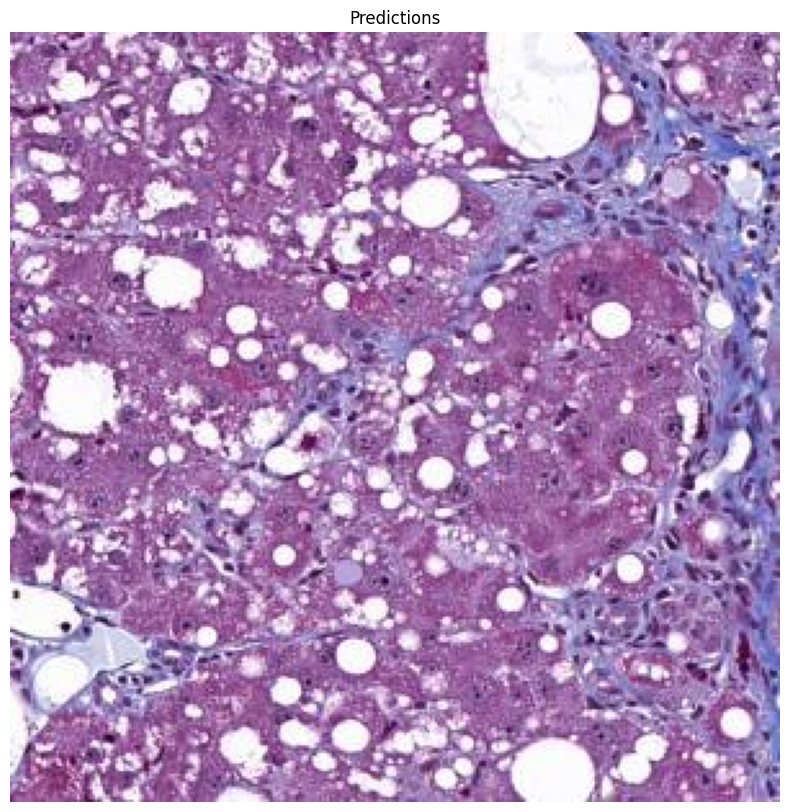

Output image saved as output1.jpg

Disease Details:


In [ ]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

def test_model(image_path, model_path="/content/runs/detect/liver_disease_model.pt/weights/best.pt"):
    """
    Enhances the YOLO model predictions by calculating tumor size, location, severity, and count.
    """
    # Load the trained model
    model = YOLO(model_path)

    # Run inference on the image
    results = model.predict(source=image_path, save=False)  # Do not save in 'runs/detect/'

    # Extract bounding boxes, labels, and confidences
    boxes = results[0].boxes.xyxy  # Bounding box coordinates
    labels = results[0].boxes.cls  # Class labels
    confidences = results[0].boxes.conf  # Confidence scores

    # Load the image
    img = cv2.imread(image_path)

    # Tumor details
    tumor_details = []

    # Loop through results and process each bounding box
    for i in range(len(boxes)):
        x1, y1, x2, y2 = map(int, boxes[i])  # Convert box coordinates to integers
        label = int(labels[i])  # Convert label to integer
        confidence = confidences[i]  # Confidence score



        # label name
        if label == 0:
          label = "ballooning"
        elif label == 1:
          label = "fibrosis"
        elif label == 2:
          label = "inflammation"
        else :
          label = "steatosis"

        # Calculate size (area) of the tumor
        width = round((x2 - x1) * 0.2645833333)
        height = round((y2 - y1) * 0.2645833333)
        area = width * height

        # Determine severity based on tumor size
        if area < 1000:
            severity = "Low"
        elif 1000 <= area < 5000:
            severity = "Moderate"
        else:
            severity = "High"

        # Determine tumor location (e.g., divide liver into quadrants)
        center_x, center_y = (x1 + x2) // 2, (y1 + y2) // 2
        if center_x < img.shape[1] // 2 and center_y < img.shape[0] // 2:
            location = "Upper Left lobe"
        elif center_x >= img.shape[1] // 2 and center_y < img.shape[0] // 2:
            location = "Upper Right lobe"
        elif center_x < img.shape[1] // 2 and center_y >= img.shape[0] // 2:
            location = "Lower Left lobe"
        else:
            location = "Lower Right lobe"

        # Append details
        tumor_details.append({
            "label": label,
            "confidence": round(float(confidence), 2),
            "area": area,
            "size": f"{width}mm x {height}mm",
            "location": location,
            "severity": severity
        })

        # Draw the bounding box
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 255), 2)
        text = f"Class {label}, {severity} ({confidence:.2f})"
        cv2.putText(img, text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

    # Save the image with bounding boxes as 'output1.jpg'
    output_path = "output1.jpg"
    cv2.imwrite(output_path, img)

    # Visualize predictions
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 10))
    plt.imshow(img_rgb)
    plt.axis("off")
    plt.title("Predictions")
    plt.show()

    print(f"Output image saved as {output_path}")
    print("\nDisease Details:")
    for i, tumor in enumerate(tumor_details, 1):
        print(f"Disease {i}: {tumor}")

# Example usage
image_path = "/content/liver-disease-2/test/images/15_242_212_25_20_jpg.rf.0e1711a2ca5c5d3edb0f4d1d983dfd61.jpg"  # Replace with your image path

# Test the model and save the result as output1.jpg
test_model(image_path)
